In [1]:
from eodag import EODataAccessGateway, setup_logging

setup_logging(1)  # 0: nothing, 1: only progress bars, 2: INFO, 3: DEBUG

dag = EODataAccessGateway()
geometry = "POLYGON ((1.845703 42.742709, 1.845703 44.20951, 5.537109 44.20951, 5.537109 42.742709, 1.845703 42.742709))"
search_results, total_count = dag.search(
    productType="S2_MSI_L1C",
    geom=geometry,
    start="2022-06-07",
    end="2022-06-30",
    cloudCover=77,
)

In [2]:
search_results

SearchResult([EOProduct(id=S2B_MSIL1C_20230606T103629_N0509_R008_T31TDH_20230606T124543, provider=peps),
              EOProduct(id=S2B_MSIL1C_20230606T103629_N0509_R008_T31TDH_20230606T111910, provider=peps),
              EOProduct(id=S2B_MSIL1C_20230606T103629_N0509_R008_T31TEH_20230606T111910, provider=peps),
              EOProduct(id=S2B_MSIL1C_20230606T103629_N0509_R008_T31TGJ_20230606T111910, provider=peps),
              EOProduct(id=S2B_MSIL1C_20230606T103629_N0509_R008_T31TFJ_20230606T111910, provider=peps),
              EOProduct(id=S2B_MSIL1C_20230606T103629_N0509_R008_T31TEK_20230606T111910, provider=peps),
              EOProduct(id=S2B_MSIL1C_20230606T103629_N0509_R008_T31TFH_20230606T111910, provider=peps),
              EOProduct(id=S2B_MSIL1C_20230606T103629_N0509_R008_T31TGK_20230606T111910, provider=peps),
              EOProduct(id=S2B_MSIL1C_20230606T103629_N0509_R008_T31TEJ_20230606T111910, provider=peps),
              EOProduct(id=S2B_MSIL1C_20230606T103629_N

In [1]:
from eodag import EODataAccessGateway, setup_logging

setup_logging(1)  # 0: nothing, 1: only progress bars, 2: INFO, 3: DEBUG

dag = EODataAccessGateway()
geometry = "POLYGON ((3.768311 43.659659, 3.768311 43.683499, 3.806763 43.683499, 3.806763 43.659659, 3.768311 43.659659))"
search_results, total_count = dag.search(
    productType="S2_MSI_L2A_COG",
    geom=geometry,
    start="2022-06-07",
    end="2022-06-15",
    cloudCover=77,
)

In [6]:
search_results

SearchResult([EOProduct(id=S2B_31TEJ_20220611_0_L2A, provider=earth_search_cog)])

In [2]:
selected_item = search_results[0]

In [ ]:
from IPython.display import Image

Image(url=selected_item.assets["thumbnail"]["href"], width=500)


In [3]:
import rioxarray

ds = rioxarray.open_rasterio(selected_item.assets["overview"]["href"])


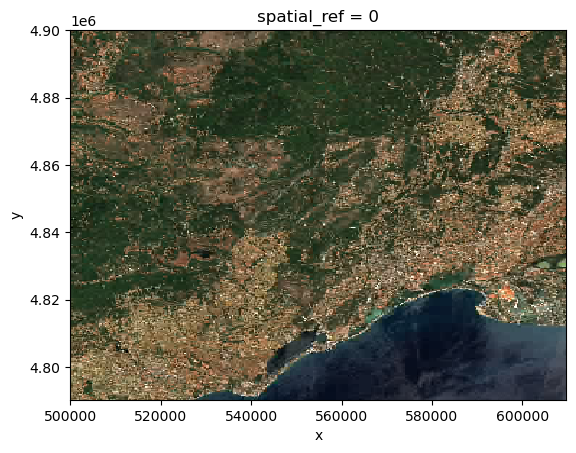

In [4]:
ds.plot.imshow(rgb="band")


In [40]:
ds


<xarray.DataArray (band: 3, y: 343, x: 343)>
array([[[126, 113, ...,  44,  48],
        [108,  86, ...,  47,  54],
        ...,
        [118, 103, ...,  65,  75],
        [100, 122, ...,  65,  75]],

       [[ 89,  88, ...,  50,  54],
        [ 83,  72, ...,  53,  60],
        ...,
        [102,  87, ...,  71,  81],
        [ 84, 106, ...,  71,  81]],

       [[ 66,  65, ...,  28,  32],
        [ 60,  49, ...,  31,  38],
        ...,
        [ 68,  53, ...,  84,  94],
        [ 50,  72, ...,  84,  94]]], dtype=uint8)
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 5.001e+05 5.005e+05 ... 6.093e+05 6.096e+05
  * y            (y) float64 4.9e+06 4.9e+06 4.899e+06 ... 4.791e+06 4.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [42]:
selected_item.assets["visual"]["href"]

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/T/EJ/2022/6/S2B_31TEJ_20220611_0_L2A/TCI.tif'

In [9]:
import rioxarray
ds = rioxarray.open_rasterio(selected_item.assets["visual"]["href"], overview_level=2)

In [20]:
ds.spatial_ref.crs_wkt

'PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]'

In [11]:
ds

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
[5655387 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 5e+05 5.001e+05 5.002e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 4.9e+06 4.9e+06 4.9e+06 ... 4.79e+06 4.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

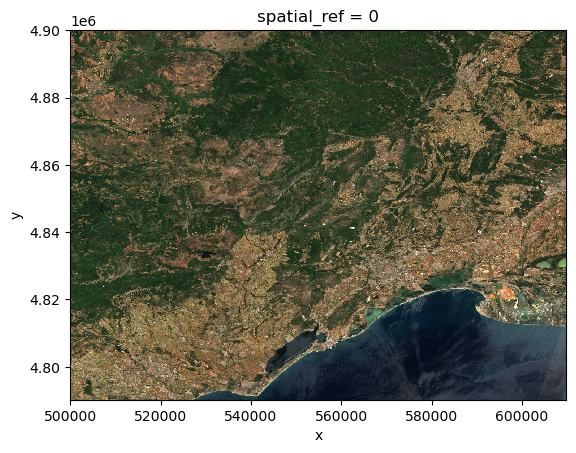

In [10]:
ds.plot.imshow(x='x', y='y', rgb="band")

In [5]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [39]:
time_range = "2020-12-01/2020-12-31"
bbox = [-122.2751, 47.5469, -121.9613, 47.7458]

search = catalog.search(collections=["sentinel2"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)

0

In [ ]:
items[0].assets